In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
# Operations
x = tf.constant([[1,2],[3,4]])
y = tf.constant([[1,2],[3,4]])
print(tf.matmul(x,y))

In [ ]:
tf.transpose(tf.matmul(x,y))

In [ ]:
import numpy as np

np_arr = np.array([[1,2],[3,4]])
np_arr.shape

In [ ]:
tf_tensor = tf.convert_to_tensor(np_arr,dtype=tf.float32)
tf_tensor

In [ ]:
# Gradient Calculation: Differentiation
x=tf.Variable(5.0)
with tf.GradientTape() as tape:
  y = x**2

dy_dx = tape.gradient(y,x)
dy_dx.numpy()



In [ ]:
from tensorflow import keras
keras.__version__

# ANN: Single Perceptron Model

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()


In [ ]:
# Normalize
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
# Model Buillding for single layer perceptron
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss,test_acc

# Multilinear Perceptron

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [ ]:
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='sigmoid'),
    tf.keras.layers.Dense(128,activation='sigmoid'),
    tf.keras.layers.Dense(64,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss,test_acc

# ANN Model: Cancer Dataset

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [128]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [129]:
x = data.data
y = data.target

In [130]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [132]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim=30))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7223 - loss: 0.5868 - val_accuracy: 0.9341 - val_loss: 0.2839
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9373 - loss: 0.2531 - val_accuracy: 0.9451 - val_loss: 0.1698
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9579 - loss: 0.1327 - val_accuracy: 0.9560 - val_loss: 0.1310
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9759 - loss: 0.0881 - val_accuracy: 0.9670 - val_loss: 0.1123
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0883 - val_accuracy: 0.9560 - val_loss: 0.1067
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9823 - loss: 0.0686 - val_accuracy: 0.9560 - val_loss: 0.1021
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9895 - loss: 0.0511 - val_accuracy: 0.9670 - val_loss: 0.0972
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9834 - loss: 0.0554 - val_accuracy: 0.9670 - 

In [135]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,869 (144.02 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,580 (96.02 KB)

In [136]:
y_pred = model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[9.9853802e-01],
       [8.9055933e-12],
       [1.2933687e-06],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.9118416e-23],
       [4.2474773e-19],
       [6.0779223e-04],
       [8.9425826e-01],
       [1.0000000e+00],
       [9.6896863e-01],
       [5.5662756e-05],
       [9.9999982e-01],
       [5.1129572e-03],
       [1.0000000e+00],
       [1.7716514e-09],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0063135e-13],
       [9.9999046e-01],
       [9.9999964e-01],
       [7.0142941e-19],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [4.3503984e-13],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.2388926e-05],
       [9.9999863e-01],
       [1.4656015e-10],
       [9.9958003e-01],
       [1.0000000e+00],
       [2.584700

In [137]:
y_pred = (y_pred>0.5).astype('int')
y_pred

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [138]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [140]:
confusion_matrix(y_test,y_pred)

array([[41,  2],
       [ 1, 70]])

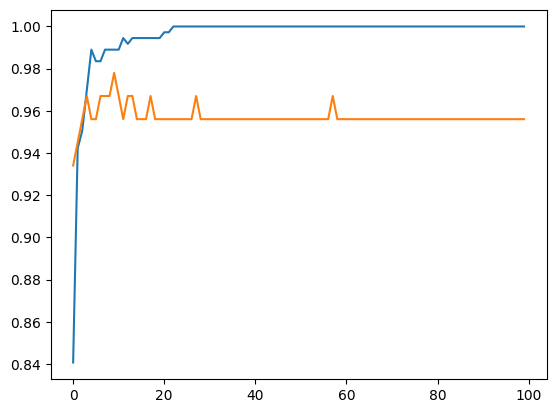

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

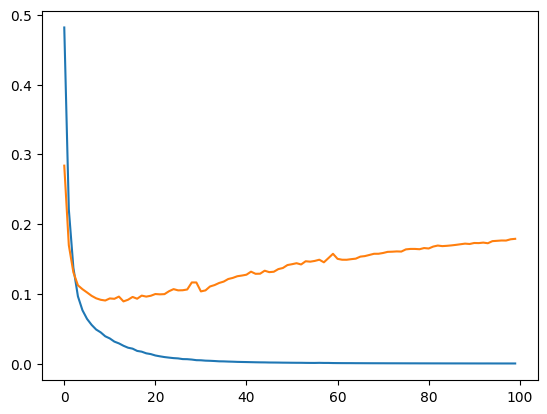

In [142]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [143]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9707 - loss: 0.2382
0.19220131635665894 0.9736841917037964


# CNN

In [152]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [145]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [146]:
X_train.shape

(60000, 28, 28)

In [147]:
X_test.shape

(10000, 28, 28)

In [148]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [149]:
# Preprocessing
# Reshape to (samples, height, width, channels)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [150]:
# Normalize
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [153]:
# One hot Encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

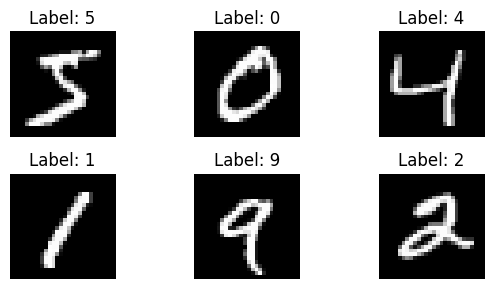

In [154]:
# Visualize
plt.figure(figsize=(6,3))
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [155]:
# Build Model
model = Sequential()

## Block1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Block2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Flatten
model.add(Flatten())

### Fully connected layers
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

## Output Layer
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [159]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


ValueError: Could not interpret loss identifier: categorial_crossentropy

In [168]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
history = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.7804 - loss: 0.6918 - val_accuracy: 0.9769 - val_loss: 0.0787
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9662 - loss: 0.1165 - val_accuracy: 0.9847 - val_loss: 0.0526
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9753 - loss: 0.0794 - val_accuracy: 0.9875 - val_loss: 0.0433
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.9806 - loss: 0.0634 - val_accuracy: 0.9876 - val_loss: 0.0448
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9895 - val_loss: 0.0364
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9879 - loss: 0.0363 - val_accuracy: 0.9904 - val_loss: 0.0338
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9905 - loss: 0.0320 - 

In [171]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9887 - loss: 0.0329


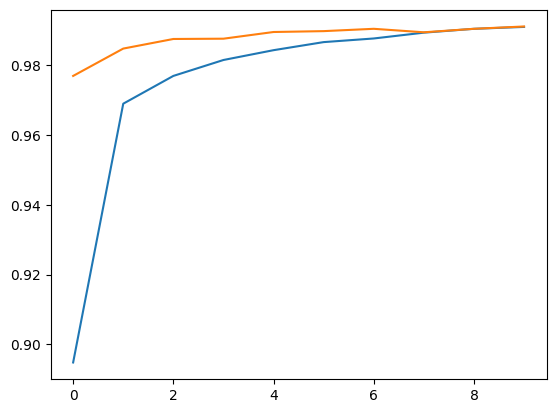

In [172]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])